<a href="https://colab.research.google.com/github/NafisaTabassum300/Final-Project-on-Predicting-CO2-Emission-from-Vehicles-Using-Multiple-Linear-Regression-Model/blob/main/Project_WM_ASDS04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Final Project *
# Team members:   **20229035**: Nafisa Tabassum & ***20229005***: A.F.S. Ahad Rahman Khan
                               
                               9th Batch
                               (Fall 2022 semester)

In [1]:
import pandas as pd
import numpy as np


# ***# Obtaining Dataset*** 
Here, we've obtained a dataset of Carbon Di-Oxide emission from different types of vehicles.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumptionCo2 _Used for project.xlsx to FuelConsumptionCo2 _Used for project.xlsx


In [4]:
df = pd.read_excel(next(iter(uploaded)))    
   #files.upload() function is used to upload an Excel file to Google Colab, and the pd.read_excel() function is used to read the uploaded file. The next(iter(uploaded)) command is used to get the name of the uploaded file, which is passed as an argument to the pd.read_excel() function. 

# **#Performing EDA and Data Preprocessing** 

In [78]:
df.head(7)

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.2,3.0,CNG,6.4,5.4,6.0,138
1,1.2,3.0,CNG,7.0,5.6,6.4,147
2,1.0,3.0,DIesel,6.9,5.7,6.4,147
3,1.0,3.0,DIesel,6.9,5.7,6.4,147
4,1.5,4.0,CNG,4.6,4.9,4.7,108
5,2.0,4.0,CNG,4.7,4.9,4.8,110
6,1.8,4.0,CNG,4.7,4.9,4.8,110


In [6]:
df.tail(7)

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
1060,6.0,12.0,DIesel,20.0,12.2,16.5,380
1061,6.0,12.0,DIesel,20.0,12.2,16.5,380
1062,6.7,12.0,DIesel,20.7,12.8,17.1,393
1063,6.7,12.0,DIesel,20.7,12.8,17.1,393
1064,6.7,12.0,DIesel,20.7,12.7,17.1,393
1065,6.7,12.0,DIesel,20.7,12.7,17.1,393
1066,6.5,12.0,DIesel,22.8,12.9,18.3,421


In [7]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1064.000000,1066.000000,1067.000000,1065.000000,1067.000000
mean,3.346298,5.797932,13.297280,9.474602,11.584789,256.228679
std,1.415895,1.798284,4.103106,2.794510,3.487528,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.225000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.575000,10.850000,13.400000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1064 non-null   float64
 2   FUELTYPE              1066 non-null   object 
 3   FUELCONSUMPTION_CITY  1066 non-null   float64
 4   FUELCONSUMPTION_HWY   1067 non-null   float64
 5   FUELCONSUMPTION_COMB  1065 non-null   float64
 6   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 58.5+ KB


*From the above outputs, we can see that there are 1067 rows and 7 columns. Among them, ENGINESIZE, FUELCONSUMPTION_HWY and CO2EMISSIONS have no null value. There are three null values in CYLYNDERS, 1 null value in FUELTYPE and FUELCONSUMPTION_CITY each. FUELCONSUMPTION_COMB has two null values. As there are sufficient numbers of data present for modelling, we decide to drop the rows containing null values. 

*We have also changed the column headings to make the data frame more readable.





### ***Treating null values:***

In [9]:
emission = df.dropna(how='any', axis=0)          #Mentioning axis=0 ensures dropping of a row with null value. 
emission.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.2,3.0,CNG,6.4,5.4,6.0,138
1,1.2,3.0,CNG,7.0,5.6,6.4,147
2,1.0,3.0,DIesel,6.9,5.7,6.4,147
3,1.0,3.0,DIesel,6.9,5.7,6.4,147
4,1.5,4.0,CNG,4.6,4.9,4.7,108


In [10]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1061 non-null   float64
 1   CYLINDERS             1061 non-null   float64
 2   FUELTYPE              1061 non-null   object 
 3   FUELCONSUMPTION_CITY  1061 non-null   float64
 4   FUELCONSUMPTION_HWY   1061 non-null   float64
 5   FUELCONSUMPTION_COMB  1061 non-null   float64
 6   CO2EMISSIONS          1061 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 66.3+ KB


After removing the null values, we have stored the info in the emission dataframe having 1061 rows and 7 columns. 

In [11]:
emission = emission.rename(columns={'ENGINESIZE': 'ENGINE_SIZE', 'FUELCONSUMPTION_CITY': 'FUEL_CONSUMPTION_CITY','FUELTYPE ': 'FUEL_TYPE ', 'FUELCONSUMPTION_HWY': 'FUEL_CONSUMPTION_HWY' , 'FUELCONSUMPTION_COMB': 'FUEL_CONSUMPTION_COMB', 'CO2EMISSIONS': 'CO2_EMISSIONS' })
emission.head()

,ENGINE_SIZE,CYLINDERS,FUELTYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS
0,1.2,3.0,CNG,6.4,5.4,6.0,138
1,1.2,3.0,CNG,7.0,5.6,6.4,147
2,1.0,3.0,DIesel,6.9,5.7,6.4,147
3,1.0,3.0,DIesel,6.9,5.7,6.4,147
4,1.5,4.0,CNG,4.6,4.9,4.7,108


Here, CO2 emission is the target variables and seven others are feature varible. We'll use this emission dataset for further calculation.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


### ***Data Visualization:***

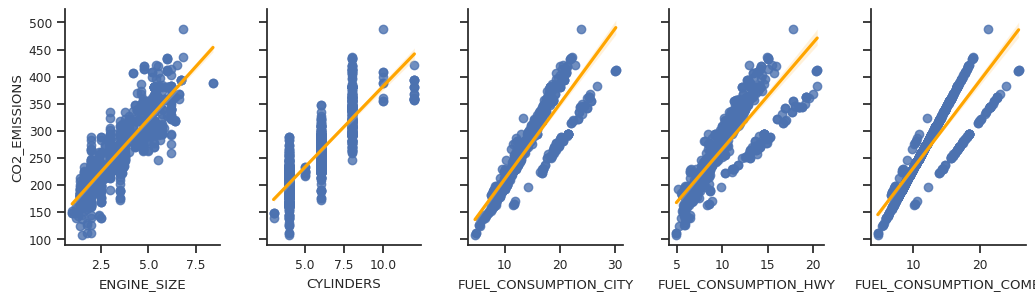

In [13]:
# Create scatter plots for all numeric features against the target variable CO2_EMISSIONS
num_cols = ['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY', 'FUEL_CONSUMPTION_HWY', 'FUEL_CONSUMPTION_COMB']

sns.set(style="ticks", font_scale=0.8)
g = sns.pairplot(emission, y_vars=["CO2_EMISSIONS"], x_vars=num_cols, height=3, aspect=0.7, kind="reg", plot_kws={'line_kws':{'color':'orange'}})

g.fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

### ***Detecting Outliers:***

In [14]:
from scipy import stats

In [15]:
# Define the numerical columns for which we want to detect outliers
num_cols = ['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY', 'FUEL_CONSUMPTION_HWY', 'FUEL_CONSUMPTION_COMB']

# Calculate the z-score and IQR for each numerical column
for col in num_cols:
    zscore = np.abs(stats.zscore(emission[col]))
    iqr = stats.iqr(emission[col])
    
    # Detect the outliers using the z-score and IQR methods
    zscore_outliers = emission[zscore > 3][col]
    iqr_outliers = emission[(emission[col] < np.percentile(emission[col], 25) - 1.5*iqr) | (emission[col] > np.percentile(emission[col], 75) + 1.5*iqr)][col]
    
    # Print the number and values of the outliers detected by each method
    print(f"{col}:")
    print(f"Number of z-score outliers: {len(zscore_outliers)}")
    print(f"Z-score outliers: {zscore_outliers.values}")
    print(f"Number of IQR outliers: {len(iqr_outliers)}")
    print(f"IQR outliers: {iqr_outliers.values}")



ENGINE_SIZE:
Number of z-score outliers: 2
Z-score outliers: [8.4 8.4]
Number of IQR outliers: 2
IQR outliers: [8.4 8.4]
CYLINDERS:
Number of z-score outliers: 17
Z-score outliers: [12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
Number of IQR outliers: 0
IQR outliers: []
FUEL_CONSUMPTION_CITY:
Number of z-score outliers: 7
Z-score outliers: [25.7 25.7 26.7 30.  30.  30.2 30.2]
Number of IQR outliers: 26
IQR outliers: [24.  25.  25.  23.7 23.9 23.9 23.7 23.9 23.9 24.5 24.5 24.1 25.7 25.7
 24.9 25.3 25.3 25.3 25.3 25.5 26.7 30.  30.  30.2 30.2 23.9]
FUEL_CONSUMPTION_HWY:
Number of z-score outliers: 20
Z-score outliers: [18.8 18.5 18.5 18.8 18.5 18.5 18.  18.  19.2 19.6 19.3 19.3 19.3 19.3
 20.  20.5 20.4 20.4 20.5 20.5]
Number of IQR outliers: 34
IQR outliers: [16.7 16.7 16.9 17.  16.1 16.1 16.6 17.7 17.7 16.9 16.9 18.8 18.5 18.5
 18.8 18.5 18.5 18.  18.  19.2 17.8 17.8 19.6 19.3 19.3 19.3 19.3 20.
 20.5 20.4 20.4 20.5 20.5 17.8]
FUEL_CONSUMPTION_COMB:
Number of z-s

The z-score method detected 2 outliers for the 'ENGINE_SIZE' column and 20 outliers for the 'FUEL_CONSUMPTION_HWY' column, while there were no outliers detected for 'CYLINDERS' and 'FUEL_CONSUMPTION_CITY' and 'FUEL_CONSUMPTION_COMB' columns using this method. The z-score outliers are those values that lie more than 3 standard deviations away from the mean.

The IQR method detected 2 outliers for the 'ENGINE_SIZE' column and 35 outliers for the 'FUEL_CONSUMPTION_HWY' column, while there were no outliers detected for 'CYLINDERS' and 'FUEL_CONSUMPTION_CITY' and 'FUEL_CONSUMPTION_COMB' columns using this method. The IQR outliers are those values that are below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR.

Here, the IQR method is more conservative and from domain knowledge, we decide to treat the outliers determined using z-score.

The following figures graphically shows the outliers detected by z-score.

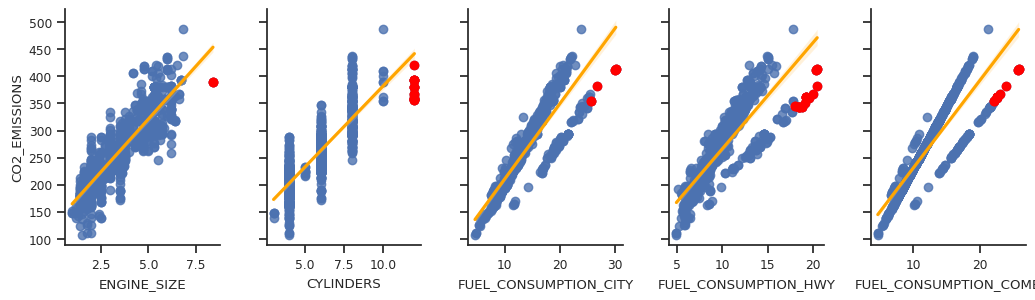

In [16]:
# Define the numerical columns for which we want to detect outliers
num_cols = ['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY', 'FUEL_CONSUMPTION_HWY', 'FUEL_CONSUMPTION_COMB']

# Create a new column to store the z-score of each data point for each numerical column
for col in num_cols:
    emission[f'{col}_zscore'] = np.abs(stats.zscore(emission[col]))

# Create scatter plots for all numeric features against the target variable CO2_EMISSIONS
sns.set(style="ticks", font_scale=0.8)
g = sns.pairplot(emission, y_vars=["CO2_EMISSIONS"], x_vars=num_cols, height=3, aspect=0.7, kind="reg", plot_kws={'line_kws':{'color':'orange'}})

# Loop through each numerical column and add red markers to the scatter plot for each z-score outlier
for i, col in enumerate(num_cols):
    zscore_outliers = emission[emission[f'{col}_zscore'] > 3]
    for index, row in zscore_outliers.iterrows():
        g.axes[0,i].scatter(row[col], row['CO2_EMISSIONS'], marker='o', color='red')

g.fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


Here, the red colored dots are identified as outliers.

In [17]:
# Find the rows with z-score outliers for each numerical column
outliers = pd.concat([emission[emission[f'{col}_zscore'] > 3] for col in num_cols])

# Drop the rows with z-score outliers
emission = emission.drop(outliers.index)

# Print info about the dataframe
print(emission.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1049
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ENGINE_SIZE                   1020 non-null   float64
 1   CYLINDERS                     1020 non-null   float64
 2   FUELTYPE                      1020 non-null   object 
 3   FUEL_CONSUMPTION_CITY         1020 non-null   float64
 4   FUEL_CONSUMPTION_HWY          1020 non-null   float64
 5   FUEL_CONSUMPTION_COMB         1020 non-null   float64
 6   CO2_EMISSIONS                 1020 non-null   int64  
 7   ENGINE_SIZE_zscore            1020 non-null   float64
 8   CYLINDERS_zscore              1020 non-null   float64
 9   FUEL_CONSUMPTION_CITY_zscore  1020 non-null   float64
 10  FUEL_CONSUMPTION_HWY_zscore   1020 non-null   float64
 11  FUEL_CONSUMPTION_COMB_zscore  1020 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 103.6+ KB
No

Here, after dropping the outliers, there is ample dataset for regression modelling. If the dataset was smaller, we could have chosen to replace the outler values with average values.

In [18]:
#Creating a new dataframe named emission_t with the outliers excluded values only.
emission_t = emission.drop(emission.columns[7:12], axis=1)
print(emission_t.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ENGINE_SIZE            1020 non-null   float64
 1   CYLINDERS              1020 non-null   float64
 2   FUELTYPE               1020 non-null   object 
 3   FUEL_CONSUMPTION_CITY  1020 non-null   float64
 4   FUEL_CONSUMPTION_HWY   1020 non-null   float64
 5   FUEL_CONSUMPTION_COMB  1020 non-null   float64
 6   CO2_EMISSIONS          1020 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.8+ KB
None


In [19]:
emission_t.head(15)

,ENGINE_SIZE,CYLINDERS,FUELTYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS
0,1.2,3.0,CNG,6.4,5.4,6.0,138
1,1.2,3.0,CNG,7.0,5.6,6.4,147
2,1.0,3.0,DIesel,6.9,5.7,6.4,147
3,1.0,3.0,DIesel,6.9,5.7,6.4,147
4,1.5,4.0,CNG,4.6,4.9,4.7,108
5,2.0,4.0,CNG,4.7,4.9,4.8,110
6,1.8,4.0,CNG,4.7,4.9,4.8,110
7,1.4,4.0,DIesel,5.6,5.2,5.4,124
8,2.0,4.0,CNG,5.3,5.7,5.5,126
9,1.8,4.0,CNG,5.3,5.8,5.5,126


### ***Identifying Correlations:***

In the emission_t dataframe, we can see linear relationship in the data from the previous graphs. Now, we'll form a heatmap to identify how strongly they are correlated.

<ipython-input-20-7761670d5639>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = emission_t.corr()


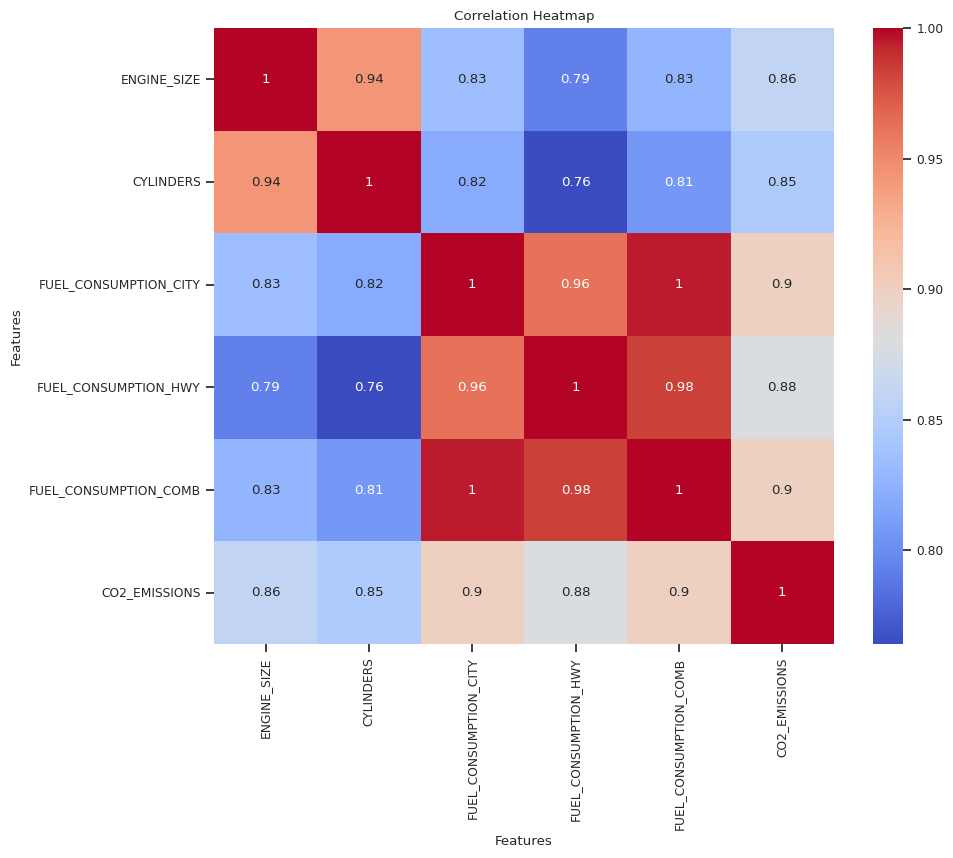

In [20]:
# Calculate the correlation matrix
corr = emission_t.corr()

# Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)

# Show the plot
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Looking at the correlation heatmap, we can see that the CO2 emissions variable has a high positive correlation with the engine size (0.86) and cylinders (0.85). This indicates that as the engine size and cylinders increase, so does the CO2 emissions.

Additionally, the fuel consumption variables (city, highway, and combined) also have a high positive correlation with CO2 emissions, indicating that higher fuel consumption is associated with higher CO2 emissions.

We can identify multicollinearities by looking for pairs of variables with high correlation coefficients (closer to 1 or -1). In our case, we can see that there is a high correlation between the FUEL_CONSUMPTION_CITY, FUEL_CONSUMPTION_HWY, and FUEL_CONSUMPTION_COMB variables, since they all measure fuel consumption in different driving conditions.

Additionally, there is also a high correlation between ENGINE_SIZE and CYLINDERS, which is also expected since these variables are both related to the size and power of the engine.



### ***Selecting numerical features to remove multicolinearity through p-test***

In [21]:
from scipy.stats import pearsonr

# calculate Pearson's correlation coefficient and p-value between two variables
corr1, p_value1 = pearsonr(emission['FUEL_CONSUMPTION_COMB'], emission['CO2_EMISSIONS'])
corr2, p_value2 = pearsonr(emission['FUEL_CONSUMPTION_CITY'], emission['CO2_EMISSIONS'])
corr3, p_value3 = pearsonr(emission['FUEL_CONSUMPTION_HWY'], emission['CO2_EMISSIONS'])
corr4, p_value4 = pearsonr(emission['ENGINE_SIZE'], emission['CO2_EMISSIONS'])
corr5, p_value5 = pearsonr(emission['CYLINDERS'], emission['CO2_EMISSIONS'])

# print the results
print(f"Pearson's correlation coefficient for FUEL_CONSUMPTION_COMB: {corr1:.3f}")
print(f"p-value for FUEL_CONSUMPTION_COMB: {p_value1:.3f}")

print(f"Pearson's correlation coefficient for FUEL_CONSUMPTION_CITY: {corr2:.3f}")
print(f"p-value for FUEL_CONSUMPTION_COMB: {p_value2:.3f}")

print(f"Pearson's correlation coefficient for FUEL_CONSUMPTION_COMB: {corr3:.3f}")
print(f"p-value for FUEL_CONSUMPTION_HWY: {p_value3:.3f}")

print(f"Pearson's correlation coefficient for ENGINE_SIZE: {corr4:.3f}")
print(f"p-value for FUEL_CONSUMPTION_HWY: {p_value4:.3f}")

print(f"Pearson's correlation coefficient for CYLINDERS: {corr5:.3f}")
print(f"p-value for FUEL_CONSUMPTION_HWY: {p_value5:.3f}")

Pearson's correlation coefficient for FUEL_CONSUMPTION_COMB: 0.900
p-value for FUEL_CONSUMPTION_COMB: 0.000
Pearson's correlation coefficient for FUEL_CONSUMPTION_CITY: 0.900
p-value for FUEL_CONSUMPTION_COMB: 0.000
Pearson's correlation coefficient for FUEL_CONSUMPTION_COMB: 0.879
p-value for FUEL_CONSUMPTION_HWY: 0.000
Pearson's correlation coefficient for ENGINE_SIZE: 0.860
p-value for FUEL_CONSUMPTION_HWY: 0.000
Pearson's correlation coefficient for CYLINDERS: 0.847
p-value for FUEL_CONSUMPTION_HWY: 0.000


Here, the pearson's correlation values can't identify the most significant variable among the variables with multicolinearity. So, using domain knowledge and values of correlation coefficient, we select FUEL_CONSUMPTION_COMB and ENGINE_SIZE as the numeric feature variables for predicting the target variable CO2 emission. 

### ***Encoding Categorical Variables:***

In [22]:
# create dummy variables for the 'FUELTYPE' column
dummy_vars = pd.get_dummies(emission_t['FUELTYPE'], prefix='FUELTYPE')

# concatenate the dummy variables with the original dataframe
emission_t_encoded = pd.concat([emission_t, dummy_vars], axis=1)

# drop the original 'FUELTYPE' column since it is no longer needed
emission_t_encoded.drop('FUELTYPE', axis=1, inplace=True)


Here, the column with categorical variable is encoded using one-hot encoding technique.

In [23]:
emission_t_encoded.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS,FUELTYPE_CNG,FUELTYPE_DIesel,FUELTYPE_Octane,FUELTYPE_Petrol
0,1.2,3.0,6.4,5.4,6.0,138,1,0,0,0
1,1.2,3.0,7.0,5.6,6.4,147,1,0,0,0
2,1.0,3.0,6.9,5.7,6.4,147,0,1,0,0
3,1.0,3.0,6.9,5.7,6.4,147,0,1,0,0
4,1.5,4.0,4.6,4.9,4.7,108,1,0,0,0


### ***Significance test for categorical variables:***

In [28]:
from scipy.stats import f_oneway

# Perform ANOVA test on the encoded categorical variables
f_stat, p_val = f_oneway(emission_t_encoded['CO2_EMISSIONS'][emission_t_encoded['FUELTYPE_CNG'] == 1], 
                         emission_t_encoded['CO2_EMISSIONS'][emission_t_encoded['FUELTYPE_DIesel'] == 1], 
                         emission_t_encoded['CO2_EMISSIONS'][emission_t_encoded['FUELTYPE_Octane'] == 1], 
                         emission_t_encoded['CO2_EMISSIONS'][emission_t_encoded['FUELTYPE_Petrol'] == 1])

# Print results
print('F-statistic:', f_stat)
print('p-value:', p_val)

F-statistic: 14.014319302946781
p-value: 5.8829424337517395e-09


The null hypothesis is that there is no difference in CO2 emissions between the different fuel types. Here, the p-value is very small (5.88e-09), indicating strong evidence against the null hypothesis. Therefore, we can conclude that there is a statistically significant difference in CO2 emissions between at least one pair of fuel types.

### ***Scaling of variables:***

In [29]:
#To identify whether scaling is necessary, we are obtaining descriptive statistics of each variable
emission_t_encoded.describe()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS,FUELTYPE_CNG,FUELTYPE_DIesel,FUELTYPE_Octane,FUELTYPE_Petrol
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,3.243725,5.638235,12.924118,9.218431,11.260980,251.840196,0.500000,0.404902,0.026471,0.068627
std,1.335398,1.599653,3.624292,2.421930,3.057128,60.080213,0.500245,0.491114,0.160609,0.252944
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,10.200000,7.475000,9.000000,207.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,6.000000,12.450000,8.700000,10.800000,246.000000,0.500000,0.000000,0.000000,0.000000
75%,4.000000,6.000000,15.000000,10.400000,12.900000,290.000000,1.000000,1.000000,0.000000,0.000000
max,6.800000,10.000000,25.000000,17.800000,21.400000,488.000000,1.000000,1.000000,1.000000,1.000000


Based on the information provided, it appears that scaling may not be necessary for the linear regression model. This is because the range of values for each variable is relatively small, with most variables having a range of less than 10, indicating that the variables are already in a similar range and do not require scaling to bring them into a similar range. Furthermore, the units for each variable are consistent (i.e., all in L/100 km or g/km), eliminating the need to scale them to ensure that they are in the same units.

In [30]:
emission_t_encoded.head(15)

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS,FUELTYPE_CNG,FUELTYPE_DIesel,FUELTYPE_Octane,FUELTYPE_Petrol
0,1.2,3.0,6.4,5.4,6.0,138,1,0,0,0
1,1.2,3.0,7.0,5.6,6.4,147,1,0,0,0
2,1.0,3.0,6.9,5.7,6.4,147,0,1,0,0
3,1.0,3.0,6.9,5.7,6.4,147,0,1,0,0
4,1.5,4.0,4.6,4.9,4.7,108,1,0,0,0
5,2.0,4.0,4.7,4.9,4.8,110,1,0,0,0
6,1.8,4.0,4.7,4.9,4.8,110,1,0,0,0
7,1.4,4.0,5.6,5.2,5.4,124,0,1,0,0
8,2.0,4.0,5.3,5.7,5.5,126,1,0,0,0
9,1.8,4.0,5.3,5.8,5.5,126,1,0,0,0


In [32]:
emission_preprocessed = emission_t_encoded.drop(['FUEL_CONSUMPTION_CITY', 'FUEL_CONSUMPTION_HWY', 'CYLINDERS'], axis=1)
emission_preprocessed.head()

,ENGINE_SIZE,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS,FUELTYPE_CNG,FUELTYPE_DIesel,FUELTYPE_Octane,FUELTYPE_Petrol
0,1.2,6.0,138,1,0,0,0
1,1.2,6.4,147,1,0,0,0
2,1.0,6.4,147,0,1,0,0
3,1.0,6.4,147,0,1,0,0
4,1.5,4.7,108,1,0,0,0


# **Model Building**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# Split the data into independent and dependent variables
x = emission_preprocessed.drop('CO2_EMISSIONS', axis=1)
y = emission_preprocessed['CO2_EMISSIONS']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_train, y_train)

# Create a dataframe with feature names and their corresponding coefficients
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': model.coef_})

# Print the coefficients with their corresponding feature names
print(coefficients)


                 Feature  Coefficient
0            ENGINE_SIZE     0.487490
1  FUEL_CONSUMPTION_COMB    22.424598
2           FUELTYPE_CNG    20.182319
3        FUELTYPE_DIesel    20.444783
4        FUELTYPE_Octane    54.224874
5        FUELTYPE_Petrol   -94.851976


# **Evaluate performance for test set**

In [42]:
# Predict the CO2 emissions using the test data
y_pred = model.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE value of the model
print('RMSE value of the model:', rmse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value of the model
print('R-squared value of the model:', r2)

RMSE value of the model: 5.415069530277368
R-squared value of the model: 0.9917250270689348


It appears that the model has a high R-squared value and a low RMSE value, suggesting that it is performing well on the test data. A high R-squared value of 0.99 indicates that 99% of the variance in the dependent variable (CO2 emissions) can be explained by the independent variables. A low RMSE value of 5.41 indicates that there is an average difference of 5.41 grams per kilometer between the predicted CO2 emissions and the actual CO2 emissions.


## ***Model building and evaluating performance of some alternative models***

### ***Using different train-test split to identify the stability of model:***

In [70]:
# Split the data into independent and dependent variables
X = emission_preprocessed.drop('CO2_EMISSIONS', axis=1)
y = emission_preprocessed['CO2_EMISSIONS']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Create a dataframe with feature names and their corresponding coefficients
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': model.coef_})
# Print the coefficients with their corresponding feature names
print(coefficients)

# Predict the CO2 emissions using the test data
y_pred = model.predict(X_test)

# Calculate the RMSE value of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE value of the model
print('RMSE value of the model:', rmse)

# Print the R-squared value of the model
print('R-squared value of the model:', model.score(X_test, y_test))



                 Feature  Coefficient
0            ENGINE_SIZE     0.575354
1  FUEL_CONSUMPTION_COMB    22.371134
2           FUELTYPE_CNG    20.243206
3        FUELTYPE_DIesel    20.462787
4        FUELTYPE_Octane    53.999059
5        FUELTYPE_Petrol   -94.705052
RMSE value of the model: 4.838156945031095
R-squared value of the model: 0.9931412952266229


Here, the variation is small, so, it can be said that the model is stable.

### ***Building a model with all the feature variables to identify the effect of multicolinearity***

We may try to build a model without any preprocessing (except one-hot encoding for categorical data) and compare it with the preprocessed model.

In [54]:
emission_except_z_score =emission.drop(emission.columns[7:12], axis=1)
# create dummy variables for the 'FUELTYPE' column
dummy_vars = pd.get_dummies(emission_except_z_score['FUELTYPE'], prefix='FUELTYPE')

# concatenate the dummy variables with the original dataframe
emission_without_preprocessing = pd.concat([emission_except_z_score, dummy_vars], axis=1)

# drop the original 'FUELTYPE' column since it is no longer needed
emission_without_preprocessing.drop('FUELTYPE', axis=1, inplace=True)

emission_without_preprocessing.head(2)

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS,FUELTYPE_CNG,FUELTYPE_DIesel,FUELTYPE_Octane,FUELTYPE_Petrol
0,1.2,3.0,6.4,5.4,6.0,138,1,0,0,0
1,1.2,3.0,7.0,5.6,6.4,147,1,0,0,0


In [56]:
# Split the data into independent and dependent variables
X = emission_without_preprocessing.drop('CO2_EMISSIONS', axis=1)
y = emission_without_preprocessing['CO2_EMISSIONS']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Linear Regression model
model_without_datapreprocessing = LinearRegression()

# Fit the model to the data
model_without_datapreprocessing.fit(X_train, y_train)

# Print the coefficients
print('Coefficients:', model_without_datapreprocessing.coef_)

# Predict the CO2 emissions using the test data
y_pred = model_without_datapreprocessing.predict(X_test)

# Calculate the RMSE value of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE value of the model
print('RMSE value of the model:', rmse)

# Print the R-squared value of the model
print('R-squared value of the model:', model_without_datapreprocessing.score(X_test, y_test))

Coefficients: [ 3.93558515e-01  6.64553910e-02  6.35257337e+00  4.28907103e+00
  1.15803581e+01  2.03779231e+01  2.03782576e+01  5.39609889e+01
 -9.47171696e+01]
RMSE value of the model: 4.862267273768438
R-squared value of the model: 0.9930727659631956


In [57]:
# Split the data into independent and dependent variables
X = emission_without_preprocessing.drop('CO2_EMISSIONS', axis=1)
y = emission_without_preprocessing['CO2_EMISSIONS']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Linear Regression model
model_without_datapreprocessing = LinearRegression()

# Fit the model to the data
model_without_datapreprocessing.fit(X_train, y_train)

# Create a dataframe with feature names and their corresponding coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

# Print the coefficients with their corresponding feature names
print(coefficients)

# Predict the CO2 emissions using the test data
y_pred = model_without_datapreprocessing.predict(X_test)

# Calculate the RMSE value of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE value of the model
print('RMSE value of the model:', rmse)

# Print the R-squared value of the model
print('R-squared value of the model:', model_without_datapreprocessing.score(X_test, y_test))

                 Feature  Coefficient
0            ENGINE_SIZE     0.393559
1              CYLINDERS     0.066455
2  FUEL_CONSUMPTION_CITY     6.352573
3   FUEL_CONSUMPTION_HWY     4.289071
4  FUEL_CONSUMPTION_COMB    11.580358
5           FUELTYPE_CNG    20.377923
6        FUELTYPE_DIesel    20.378258
7        FUELTYPE_Octane    53.960989
8        FUELTYPE_Petrol   -94.717170
RMSE value of the model: 4.862267273768438
R-squared value of the model: 0.9930727659631956


# ***Selecting final model***

Generally, it is recommended to remove highly correlated predictors to avoid multicollinearity issues and to simplify the model. This can help in interpreting the coefficients of the remaining predictors and make the model more robust to overfitting. In this case, the preprocessed model was chosen despite having almost similar accuracy to the unprocessed model. This decision was made to address the issue of multicollinearity and to improve the interpretability and robustness of the model.

In the context of modeling, robustness refers to the ability of a model to maintain its performance and accuracy under different conditions, such as changes in the dataset or the model's parameters. A robust model is less affected by outliers, noise, and other sources of variability in the data, and it can generalize well to new or unseen data. A robust model is important because it can provide reliable predictions and insights, even in challenging or uncertain situations.

Our selected final model has the following properties:
             ** Feature   Coefficient**
0            ENGINE_SIZE     0.575354
1  FUEL_CONSUMPTION_COMB    22.371134
2           FUELTYPE_CNG    20.243206
3        FUELTYPE_DIesel    20.462787
4        FUELTYPE_Octane    53.999059
5        FUELTYPE_Petrol   -94.705052
RMSE value of the model: 4.838156945031095
R-squared value of the model: 0.9931412952266229

# ***Prediction using final model***

In [77]:
# Take user inputs
engine_size = float(input("Enter the engine size (L): "))
fuel_consumption = float(input("Enter the fuel consumption (L/100km): "))
fuel_type = input("Enter the fuel type (CNG, Diesel, Octane, or Petrol): ")

# Create a dataframe with the user inputs
new_data = pd.DataFrame({'ENGINE_SIZE': [engine_size], 'FUEL_CONSUMPTION_COMB': [fuel_consumption], 'FUELTYPE_CNG': [0], 'FUELTYPE_DIesel': [0], 'FUELTYPE_Octane': [0], 'FUELTYPE_Petrol': [0]})

# Set the value of the fuel type to 1 for the appropriate column
if fuel_type == 'CNG':
    new_data['FUELTYPE_CNG'] = 1
elif fuel_type == 'Diesel':
    new_data['FUELTYPE_DIesel'] = 1
elif fuel_type == 'Octane':
    new_data['FUELTYPE_Octane'] = 1
elif fuel_type == 'Petrol':
    new_data['FUELTYPE_Petrol'] = 1

# Define a function to preprocess new data
def preprocess_new_data(data):
    # Scale the numerical variables
    data['ENGINE_SIZE'] = data['ENGINE_SIZE'] / data['ENGINE_SIZE'].max()
    data['FUEL_CONSUMPTION_COMB'] = data['FUEL_CONSUMPTION_COMB'] / data['FUEL_CONSUMPTION_COMB'].max()
    return data

# Preprocess the new data
new_data_preprocessed = preprocess_new_data(new_data)

# Use the final model to make a prediction
prediction = model.predict(new_data_preprocessed)

# Print the prediction
print('The predicted CO2 emissions for the given inputs is:', prediction[0])


Enter the engine size (L): 2.4
Enter the fuel consumption (L/100km): 8.5
Enter the fuel type (CNG, Diesel, Octane, or Petrol): CNG
The predicted CO2 emissions for the given inputs is: 27.889789430477663
